# 케라스 활용 연습 

## MNIST 데이터셋 로드 

In [233]:
from keras.datasets import mnist

In [234]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [235]:
print(train_images.shape)

(60000, 28, 28)


In [236]:
# GPU 확인
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [237]:
print(test_images.shape);print(len(test_labels));print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


## 모델 로드 

In [238]:
# 신경망 구조 
from keras import models 
from keras import layers

network = models.Sequential() # sequantial 모델 객체 
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # 이미지 특징 추출 층 
network.add(layers.Dense(10, activation='softmax')) # 1번 레이어에서 추출된 특징 소프트맥스 함수 이용해 확률 꼴로 바꾸는 층 

In [239]:
# 모델 컴파일(훈련준비)
network.compile(optimizer='rmsprop',# 최적화 방법
loss='categorical_crossentropy', # 손실함수(성능함수)
metrics=['accuracy']) # 모델 정확도 측정 방법 

In [240]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255 # train 데이터 자료형을 실수형으로 바꾸고, 255로 나눠서 크기 조정 (0과 1사이 값들로 크기 조정)

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255 # test 데이터 자료형을 실수형으로 변경 하고 255로 나눠서 크기 조정 (0과 1사이 값)

# 보통 신경망에 이미지 넣을 때는 0과 1사이 값으로 바꿔서 넣는다. 

In [241]:
# 레이블값 (정답 값) 모두 원핫인코딩 벡터 꼴로 변환 
import keras.utils 

train_labels = tf.keras.utils.to_categorical(train_labels) # 훈련용 데이터 정답값
test_labels = tf.keras.utils.to_categorical(test_labels) # 테스트 데이터 정답값 

In [242]:
train_images.shape

(60000, 784)

In [243]:
train_labels.shape

(60000, 10)

In [244]:
# 컴파일 된 모델 훈련데이터로 지도학습 하기 
network.fit(train_images, train_labels, epochs=5, batch_size=128) # batch_size: 한번에 몇 개씩 예측.평가해서 가중치 업데이트 할 건가. 

Epoch 1/5
  7/469 [..............................] - ETA: 4s - loss: 1.4083 - accuracy: 0.5904  

2022-01-18 23:02:50.895444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 4s 8ms/step - loss: 0.2558 - accuracy: 0.9269
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1042 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0690 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0497 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0381 - accuracy: 0.9889


In [245]:
# 모델에 테스트셋 넣어서 성증 교차검증 하기 
test_loss, test_acc = network.evaluate(test_images, test_labels)

 26/313 [=>............................] - ETA: 1s - loss: 0.0512 - accuracy: 0.9820

2022-01-18 23:03:10.626396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.0701 - accuracy: 0.9784


In [246]:
# 모형 성능평가 결과값 
print(f'test_loss:{test_loss}');print(f'test_acc:{test_acc}')

test_loss:0.0700913518667221
test_acc:0.9784000515937805


# 모형에 임의의 MNIST 데이터 투입해보기 

In [257]:
first_image = train_images[3].reshape((1, 28*28))

In [258]:
result = network.predict(first_image)[0]
result

array([2.3608993e-09, 9.9996030e-01, 1.2336987e-05, 8.0996138e-08,
       1.6119817e-06, 1.2742596e-08, 2.0098611e-08, 1.7875993e-05,
       7.7193372e-06, 4.1783554e-09], dtype=float32)

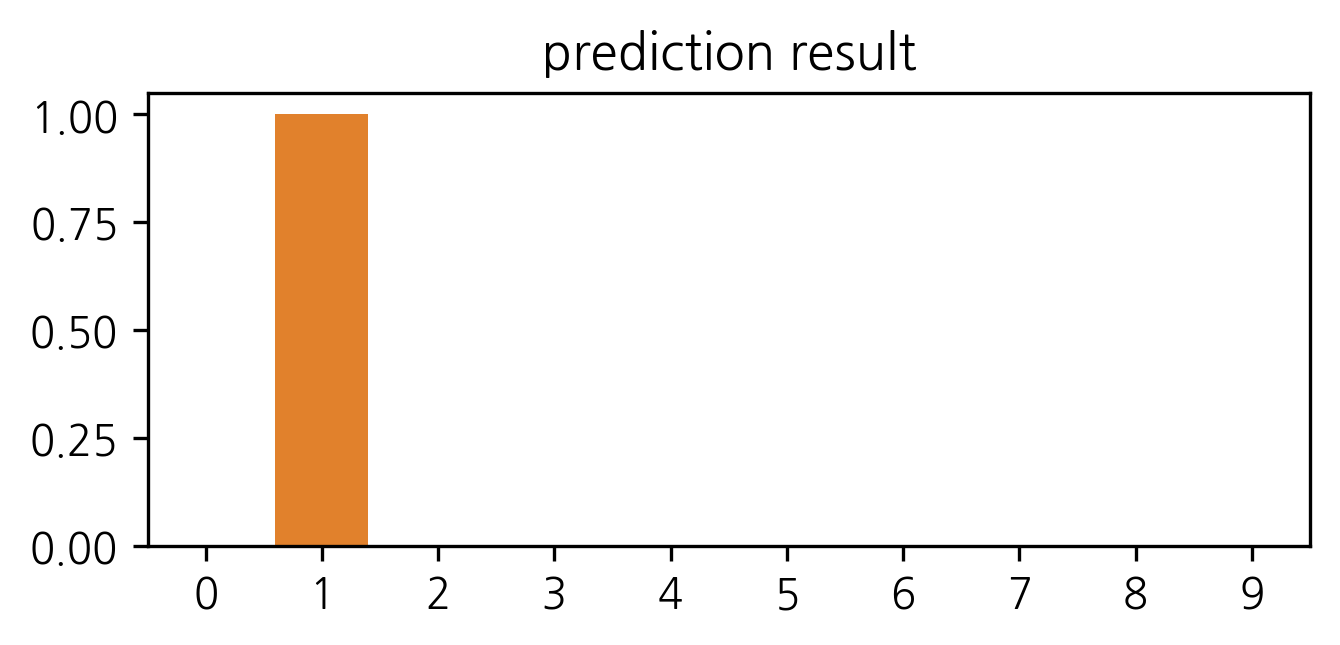

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,2))
sns.barplot(list(range(0,10)), result)
plt.title('prediction result')
plt.show()

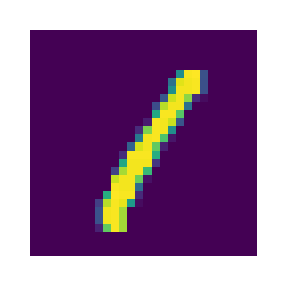

In [260]:
plt.figure(figsize=(1,1))
plt.imshow(train_images[3].reshape(28,28))
plt.axis('off')
plt.show() # 모델이 1로 분류해냈다. 

# 머신러닝 모형 입력데이터: 텐서(다차원 넘파이 배열)

In [124]:
import numpy as np

# 스칼라 
x = np.array(13)
x.ndim 

# 벡터 
x2 = np.array([1,2,3]) 
# 또는 
x2 = np.array([[1],[2],[3]])

# 행렬 
x3 = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [125]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

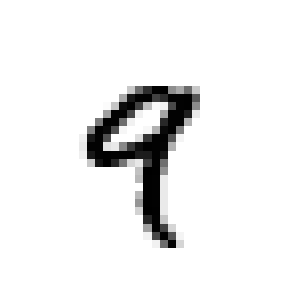

In [146]:
digit = train_images[4]
plt.figure(figsize=(1,1))
plt.imshow(digit, cmap=plt.cm.binary)
plt.axis('off')
plt.show()

In [148]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [159]:
# 렐루 함수 요소별 연산 
def naive_relu(x) : 
    assert len(x.shape) == 2
    x = x.copy() 
    for i in range(x.shape[0]) : 
        for j in range(x.shape[1]) : 
            x[i,j] = max(x[i,j], 0)
    return x

x = np.array([[-1,2],[3,4]])
naive_relu(x)

array([[0, 2],
       [3, 4]])

In [162]:
# 행렬 덧셈 연산 - 요소별 연산 구현
def naive_add(x,y) : 
    assert len(x.shape) == 2
    assert x.shape == y.shape

    x = x.copy()
    for i in range(x.shape[0]) : 
        for j in range(x.shape[1]) : 
            x[i,j] += y[i,j]
    return x

In [164]:
# 행렬_벡터 합 - 벡터 브로드캐스팅 

def naive_add_matrix_and_vector(x,y) : 
    assert len(x.shape) == 2 # 행렬
    assert len(y.shape) == 1 # 벡터 
    assert x.shape[1] == y.shape[0]

    x = x.copy() 
    for i in range(x.shape[0]) : 
        for j in range(x.shape[1]) : 
            x[i,j] = y[j]
    return x 

### 4차원 텐서 - 2차원 텐서 브로드캐스팅_테스트

In [170]:
import numpy as np

x = np.random.random((64,3,32,10))
x[0][0][0] # 0.62668923

array([0.62668923, 0.75148232, 0.00107898, 0.69927087, 0.79045923,
       0.19766149, 0.29941795, 0.23779972, 0.61271929, 0.87920646])

In [179]:
y = np.random.random((32,10))
y

array([[0.77778829, 0.59878733, 0.45451706, 0.97315788, 0.50811401,
        0.83978031, 0.96913412, 0.31768353, 0.45875485, 0.99470715],
       [0.48710577, 0.70155746, 0.28134185, 0.05200629, 0.51537562,
        0.97251234, 0.73338766, 0.20016098, 0.7419909 , 0.40458847],
       [0.67170695, 0.38222024, 0.949062  , 0.5458249 , 0.74377414,
        0.16500233, 0.98545508, 0.51093566, 0.51236396, 0.63500688],
       [0.15535086, 0.35690963, 0.50097427, 0.94904608, 0.21938257,
        0.99925933, 0.60094796, 0.95238849, 0.9926945 , 0.22924902],
       [0.63946561, 0.76202882, 0.47712356, 0.17787071, 0.3692036 ,
        0.0893334 , 0.63619716, 0.55788606, 0.08216012, 0.76435202],
       [0.59868272, 0.30357328, 0.23429367, 0.12128879, 0.21863653,
        0.85830165, 0.79787473, 0.46246147, 0.06832513, 0.63501519],
       [0.0393026 , 0.79006564, 0.68505082, 0.08563236, 0.03770184,
        0.98628341, 0.8698565 , 0.94246394, 0.71721065, 0.66566388],
       [0.43208697, 0.15210416, 0.0218155

In [180]:
y[0] # 0.777778829

array([0.77778829, 0.59878733, 0.45451706, 0.97315788, 0.50811401,
       0.83978031, 0.96913412, 0.31768353, 0.45875485, 0.99470715])

In [189]:
(x+y)[0][0][0]

array([1.40447752, 1.35026966, 0.45559603, 1.67242875, 1.29857324,
       1.0374418 , 1.26855207, 0.55548324, 1.07147413, 1.87391361])

In [191]:
x[0][0][0]+y[0]

array([1.40447752, 1.35026966, 0.45559603, 1.67242875, 1.29857324,
       1.0374418 , 1.26855207, 0.55548324, 1.07147413, 1.87391361])

### 예상대로 브로드캐스팅 후 요소별 연산한다. 

In [198]:
# 텐서 전치연산 

x = np.zeros((300,20));print(f'{x.shape}')
print('전치 후')
print(x.T.shape)

(300, 20)
전치 후
(20, 300)


In [216]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28*28)) # 1개 행 = 1개 이미지 # 행렬 꼴 이미지가 모두 벡터들로 바뀌었다. 
#train_images = train_images.astype('float32')/255

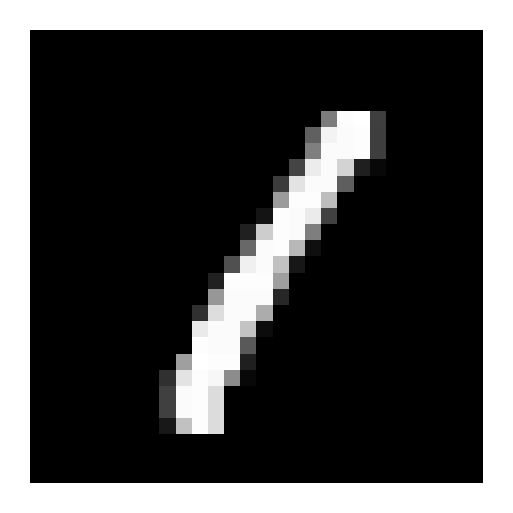

In [225]:
plt.figure(figsize=(2,2))
p = train_images[3].reshape(28,28)
plt.imshow(p, cmap=plt.cm.gray)
plt.axis('off')
plt.show()